In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Load the data
file_path = 'Euro_2024_Matches.csv'
df = pd.read_csv(file_path)

In [27]:
# Convert 'attendance' column to numeric by removing commas
df['attendance'] = df['attendance'].str.replace(',', '').astype(int)


In [28]:
# Select relevant features
features = ['Home Expected goals(xG)', 'Away Expected goals(xG)',
            'Home Total shots', 'Away Total shots', 'Home Shots on target', 'Away Shots on target',
            'Home Big chances', 'Away Big chances', 'attendance']

X = df[features]
y_home_goals = df['home_goals']
y_away_goals = df['away_goals']

In [29]:
# Split data into training and test sets
X_train, X_test, y_train_home, y_test_home = train_test_split(X, y_home_goals, test_size=0.2, random_state=42)
X_train, X_test, y_train_away, y_test_away = train_test_split(X, y_away_goals, test_size=0.2, random_state=42)

In [30]:
# Train a linear regression model to predict home team goals
model_home = LinearRegression()
model_home.fit(X_train, y_train_home)

LinearRegression()

In [31]:
# Train a linear regression model to predict away team goals
model_away = LinearRegression()
model_away.fit(X_train, y_train_away)

LinearRegression()

In [32]:
# Evaluate the home team goal prediction model
y_pred_home = model_home.predict(X_test)
mse_home = mean_squared_error(y_test_home, y_pred_home)
r2_home = r2_score(y_test_home, y_pred_home)
print(f"Home Goal Prediction Model - MSE: {mse_home:.2f}, R2: {r2_home:.2f}")

Home Goal Prediction Model - MSE: 0.54, R2: 0.01


In [33]:
# Evaluate the away team goal prediction model
y_pred_away = model_away.predict(X_test)
mse_away = mean_squared_error(y_test_away, y_pred_away)
r2_away = r2_score(y_test_away, y_pred_away)
print(f"Away Goal Prediction Model - MSE: {mse_away:.2f}, R2: {r2_away:.2f}")

Away Goal Prediction Model - MSE: 0.79, R2: -0.40


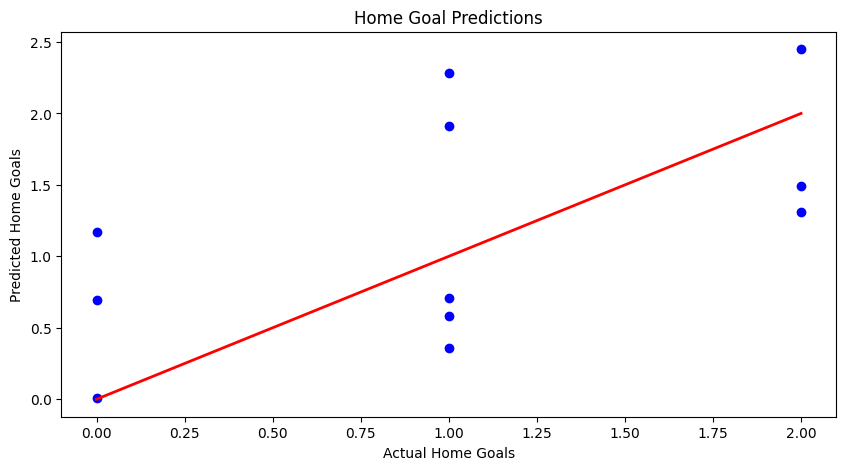

In [34]:
# Visualize home team goal predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test_home, y_pred_home, color='blue')
plt.plot([min(y_test_home), max(y_test_home)], [min(y_test_home), max(y_test_home)], color='red', linewidth=2)
plt.xlabel('Actual Home Goals')
plt.ylabel('Predicted Home Goals')
plt.title('Home Goal Predictions')
plt.show()

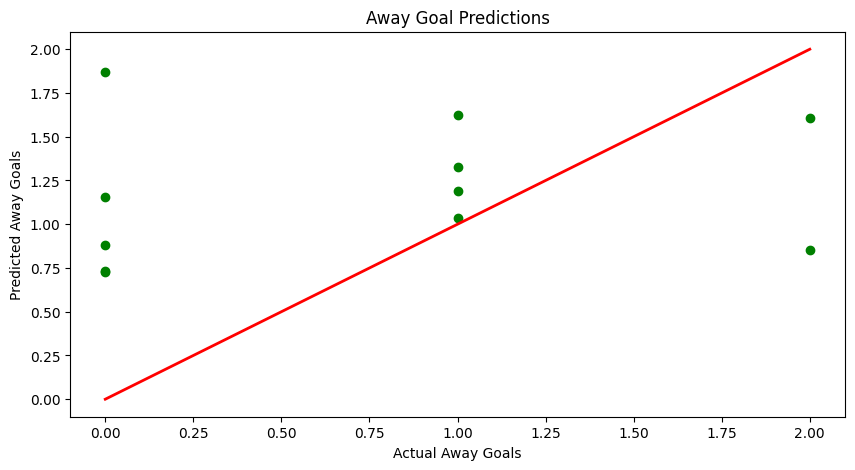

In [35]:
# Visualize away team goal predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test_away, y_pred_away, color='green')
plt.plot([min(y_test_away), max(y_test_away)], [min(y_test_away), max(y_test_away)], color='red', linewidth=2)
plt.xlabel('Actual Away Goals')
plt.ylabel('Predicted Away Goals')
plt.title('Away Goal Predictions')
plt.show()

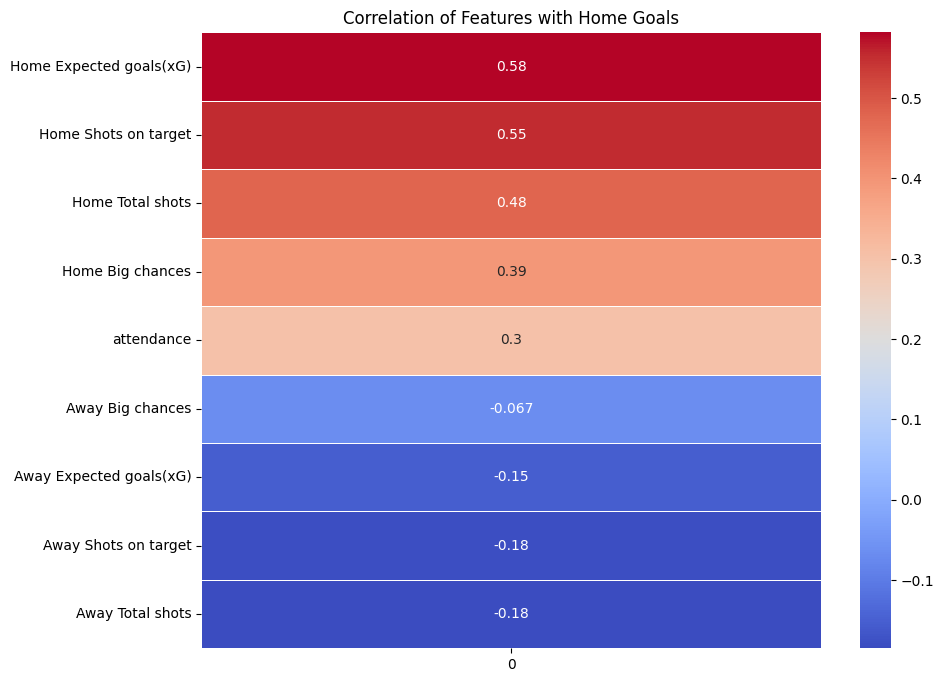

In [36]:
# Heatmap of feature correlations with home goals
plt.figure(figsize=(10, 8))
correlation_matrix_home = X.corrwith(y_home_goals).sort_values(ascending=False).to_frame()
sns.heatmap(correlation_matrix_home, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation of Features with Home Goals')
plt.show()

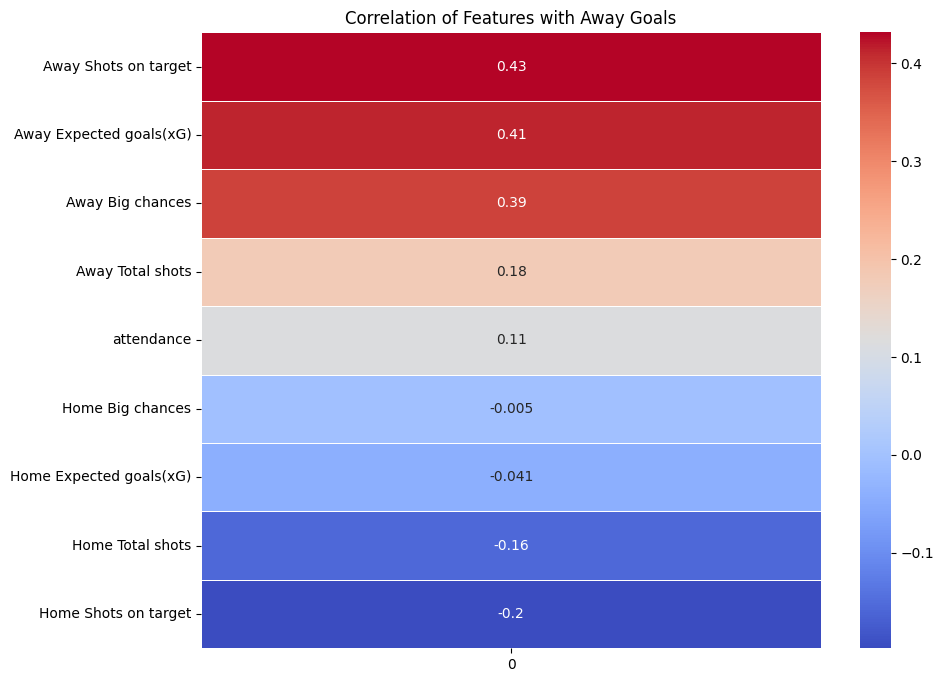

In [37]:
# Heatmap of feature correlations with away goals
plt.figure(figsize=(10, 8))
correlation_matrix_away = X.corrwith(y_away_goals).sort_values(ascending=False).to_frame()
sns.heatmap(correlation_matrix_away, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation of Features with Away Goals')
plt.show()

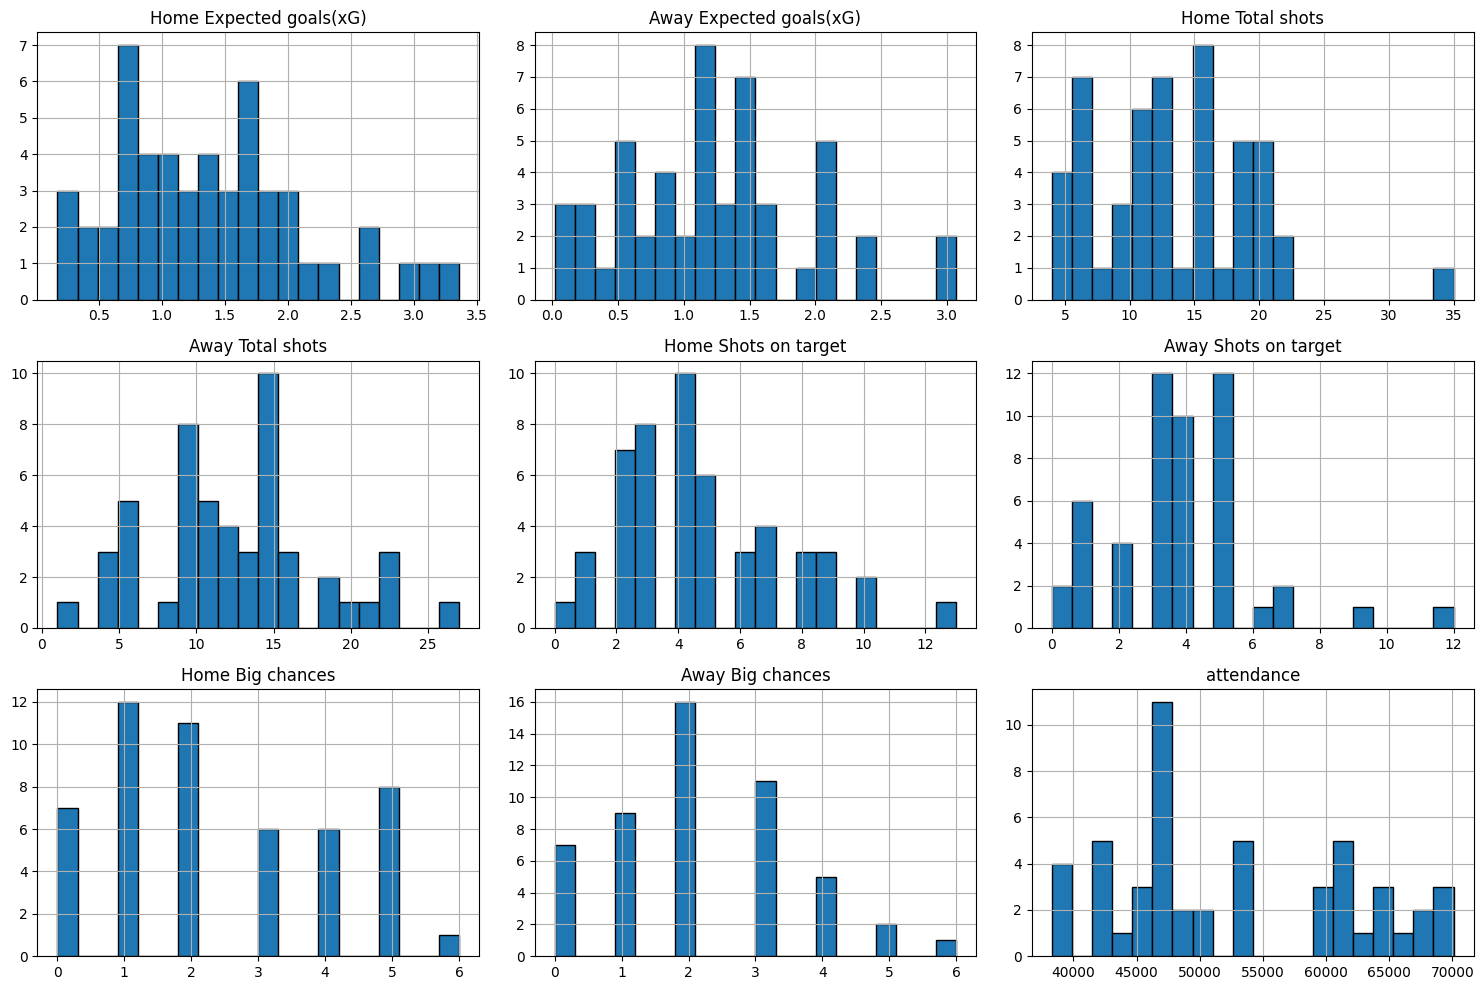

In [38]:
# Distribution of features
X.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


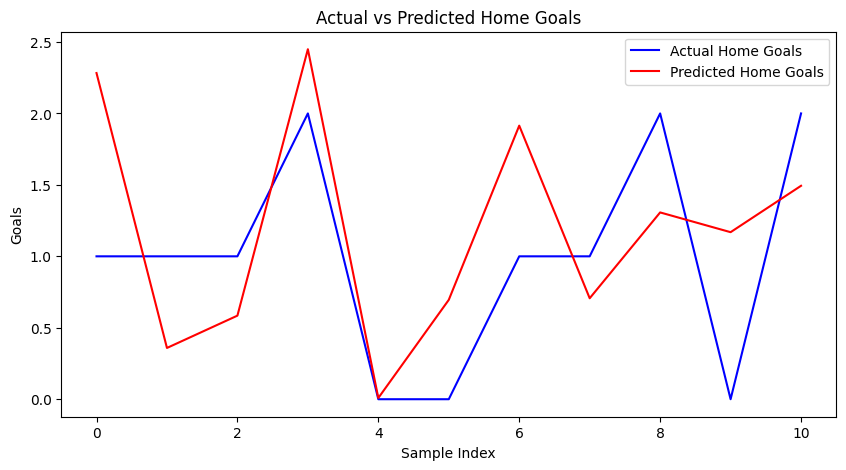

In [39]:
# Line plot of actual vs predicted home goals
plt.figure(figsize=(10, 5))
plt.plot(y_test_home.values, label='Actual Home Goals', color='blue')
plt.plot(y_pred_home, label='Predicted Home Goals', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Goals')
plt.legend()
plt.title('Actual vs Predicted Home Goals')
plt.show()

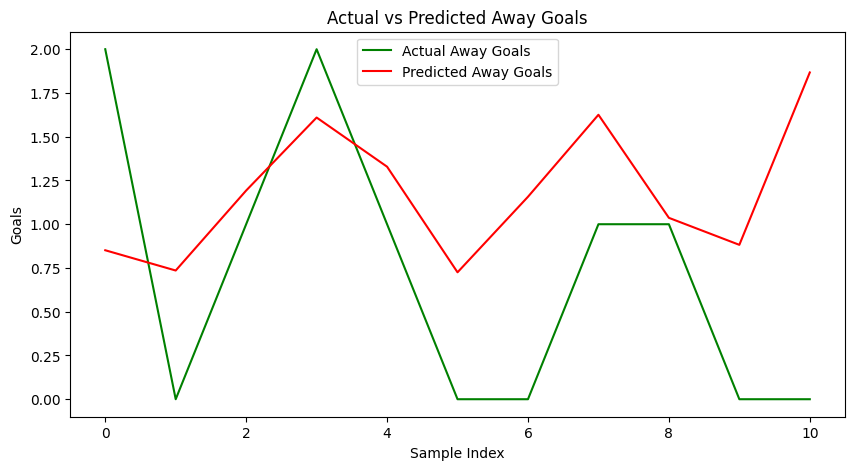

In [40]:
# Line plot of actual vs predicted away goals
plt.figure(figsize=(10, 5))
plt.plot(y_test_away.values, label='Actual Away Goals', color='green')
plt.plot(y_pred_away, label='Predicted Away Goals', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Goals')
plt.legend()
plt.title('Actual vs Predicted Away Goals')
plt.show()

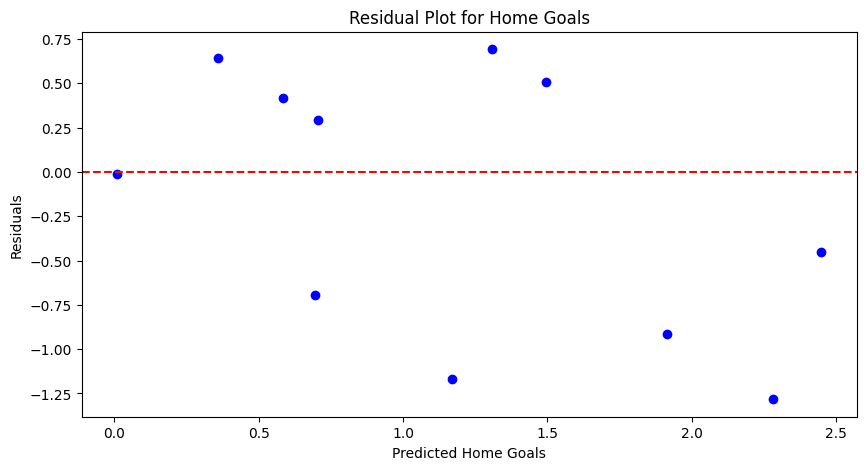

In [41]:
# Residual plot for home goals
residuals_home = y_test_home - y_pred_home
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_home, residuals_home, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Home Goals')
plt.ylabel('Residuals')
plt.title('Residual Plot for Home Goals')
plt.show()

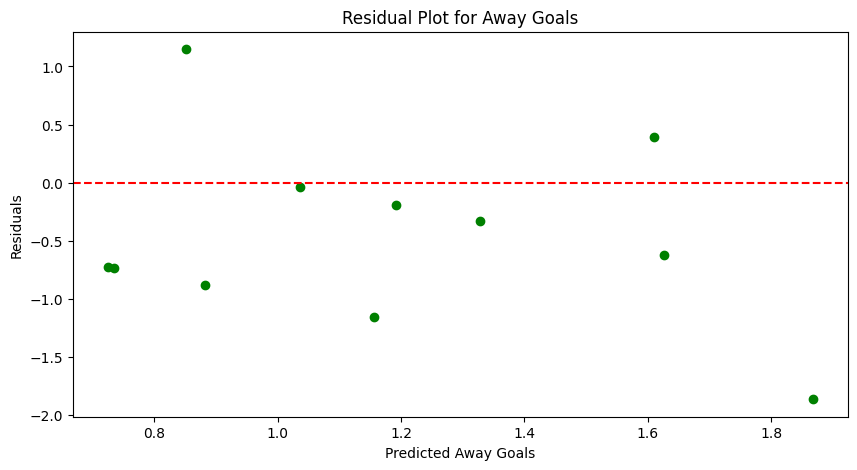

In [42]:
# Residual plot for away goals
residuals_away = y_test_away - y_pred_away
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_away, residuals_away, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Away Goals')
plt.ylabel('Residuals')
plt.title('Residual Plot for Away Goals')
plt.show()